<a href="https://colab.research.google.com/github/chsheth/ibm_dl/blob/main/cs_05e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import tensorflow as tf
import keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [75]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [76]:
#x_train.shape #50000, 32, 32, 3
#y_train.shape #50000, 1
#x_test.shape #10000, 32, 32, 3
#y_test.shape #10000,1

In [77]:
dir(cifar10)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

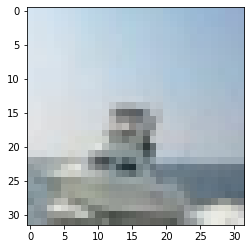

In [78]:
plt.imshow(x_train[100])

In [79]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [80]:
num_classes = 10

y_trainc = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [81]:
y_trainc[1:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [82]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [83]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_train /= 255

In [84]:
x_train[1]

array([[[0.00236832, 0.00272203, 0.00287582],
        [0.00193772, 0.00210688, 0.0020915 ],
        [0.00161476, 0.00159938, 0.00146098],
        ...,
        [0.00139946, 0.00146098, 0.00109189],
        [0.00133795, 0.00138408, 0.00109189],
        [0.00121492, 0.00124567, 0.00107651]],

       [[0.00215302, 0.00246059, 0.002599  ],
        [0.00222991, 0.00235294, 0.00236832],
        [0.00192234, 0.00192234, 0.00181469],
        ...,
        [0.00147636, 0.00152249, 0.00119954],
        [0.00118416, 0.0012303 , 0.00095348],
        [0.00109189, 0.00112265, 0.0009381 ]],

       [[0.00215302, 0.0023837 , 0.00252211],
        [0.00213764, 0.00224529, 0.00229143],
        [0.00176855, 0.00176855, 0.00172241],
        ...,
        [0.00121492, 0.00126105, 0.00098424],
        [0.00104575, 0.00107651, 0.00084583],
        [0.00103037, 0.00106113, 0.00084583]],

       ...,

       [[0.00269127, 0.00256824, 0.00255286],
        [0.00239908, 0.00236832, 0.00246059],
        [0.00236832, 0

In [85]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        2432      
                                                                 
 activation_34 (Activation)  (None, 16, 16, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 6, 6, 32)          25632     
                                                                 
 activation_35 (Activation)  (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 3, 3, 32)          0         
                                                      

In [86]:
batch_size =32
opt = RMSprop(learning_rate=0.0005, decay=1e-6)


model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_1.fit(x_train, y_trainc, validation_data=(x_test, y_testc), batch_size=batch_size, epochs=15, shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 12s 7ms/step - loss: 2.1396 - accuracy: 0.2070 - val_loss: 90452.5781 - val_accuracy: 0.1013
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0132 - accuracy: 0.2608 - val_loss: 79088.0469 - val_accuracy: 0.1154
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9290 - accuracy: 0.2933 - val_loss: 48906.2148 - val_accuracy: 0.2044
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8171 - accuracy: 0.3375 - val_loss: 55268.4531 - val_accuracy: 0.2252
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7349 - accuracy: 0.3719 - val_loss: 52764.2617 - val_accuracy: 0.2543
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6864 - accuracy: 0.3903 - val_loss: 58858.0039 - val_accuracy: 0.2528
Epoch 7/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6480 - accuracy: 0.4048 - v